In [70]:
#Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

import pandas as pd 
import numpy as np 
import statistics
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
#import catboost as cb
from datetime import datetime
from datetime import date
import datetime
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge, Lasso, ElasticNet

import warnings
warnings.filterwarnings("ignore")

In [43]:
df=pd.read_csv('Output/merged_data.csv')
products_df= pd.read_csv('Resources/olist_products_dataset.csv')
sellers_df= pd.read_csv('Resources/olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('Resources/product_category_name_translation.csv')

df=df.merge(sellers_df, on='seller_id')
df= df.merge(products_df, on="product_id")
df= df.merge(category_translation_df, on='product_category_name')

In [44]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


In [42]:
df.shape

(115609, 40)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    117329 non-null  object 
 1   customer_unique_id             117329 non-null  object 
 2   customer_zip_code_prefix       117329 non-null  int64  
 3   customer_city                  117329 non-null  object 
 4   customer_state                 117329 non-null  object 
 5   order_id                       117329 non-null  object 
 6   order_status                   117329 non-null  object 
 7   order_purchase_timestamp       117329 non-null  object 
 8   order_approved_at              117314 non-null  object 
 9   order_delivered_carrier_date   116094 non-null  object 
 10  order_delivered_customer_date  114858 non-null  object 
 11  order_estimated_delivery_date  117329 non-null  object 
 12  review_id                     

In [45]:
#convert time columns to pd.datetime
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']

df[time_columns]=df[time_columns].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115609 non-null  object        
 1   customer_unique_id             115609 non-null  object        
 2   customer_zip_code_prefix       115609 non-null  int64         
 3   customer_city                  115609 non-null  object        
 4   customer_state                 115609 non-null  object        
 5   order_id                       115609 non-null  object        
 6   order_status                   115609 non-null  object        
 7   order_purchase_timestamp       115609 non-null  datetime64[ns]
 8   order_approved_at              115595 non-null  datetime64[ns]
 9   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 10  order_delivered_customer_date  113209 non-null  datetime64[ns]
 11  

In [19]:
df.customer_state.value_counts()

SP    49527
RJ    15220
MG    13616
RS     6516
PR     5959
SC     4283
BA     4014
DF     2482
GO     2416
ES     2319
PE     1876
CE     1545
MT     1117
PA     1102
MS      854
MA      843
PB      629
PI      568
RN      566
AL      459
SE      395
TO      338
RO      285
AM      170
AC       95
AP       83
RR       52
Name: customer_state, dtype: int64

In [46]:
#Features to consider: customer state, review score, 
#1.Customer state
def cat_customer_state(x):
    if x in ['SP', 'RJ', 'MG']:
        return 1
    elif x in ['RS', 'PR', 'SC', 'BA']:
        return 2
    else:
        return 3
    
df['customer_state_cat'] = df.customer_state.apply(lambda x: cat_customer_state(x))

df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_state_cat
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,3
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,3
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,2
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,1


In [21]:
df.seller_state.value_counts()

SP    83671
MG     9228
PR     9029
RJ     4991
SC     4240
RS     2272
DF      948
BA      698
GO      547
PE      461
MA      403
ES      385
MT      147
CE      103
MS       59
RN       56
PB       43
RO       14
PI       12
SE       10
PA        8
AM        3
AC        1
Name: seller_state, dtype: int64

In [47]:
#2.Seller state
def cat_seller_state(x):
    if x in ['SP', 'MG', 'PR']:
        return 1
    elif x in ['RJ', 'SC', 'RS']:
        return 2
    else:
        return 3
    
df['seller_state_cat'] = df.seller_state.apply(lambda x: cat_customer_state(x))

df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_state_cat,seller_state_cat
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,1,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,3,1
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,3,1
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,2,1
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,1,1


In [48]:
#3.delivery_time

df['delivery_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_state_cat,seller_state_cat,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,1,1,8 days 19:30:00
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,3,1,18 days 23:19:37
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,3,1,18 days 23:19:37
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,2,1,18 days 13:42:38
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,1,1,25 days 01:23:20


In [28]:
df['delivery_time'].mean()

Timedelta('12 days 10:40:33.126765223')

In [49]:
# 4. review_upload_time

df['review_upload_time'] = df['review_answer_timestamp'] - df['review_creation_date']
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_state_cat,seller_state_cat,delivery_time,review_upload_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,8683.0,54.0,64.0,31.0,office_furniture,1,1,8 days 19:30:00,4 days 22:34:40
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1.0,8683.0,54.0,64.0,31.0,office_furniture,3,1,18 days 23:19:37,2 days 19:41:59
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1.0,8683.0,54.0,64.0,31.0,office_furniture,3,1,18 days 23:19:37,2 days 19:41:59
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,1.0,8683.0,54.0,64.0,31.0,office_furniture,2,1,18 days 13:42:38,1 days 02:43:16
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,1.0,8683.0,54.0,64.0,31.0,office_furniture,1,1,25 days 01:23:20,1 days 11:11:24


In [50]:
# 5. debt_customer

def cat_customer_debt(x):
    if x == 1:
        return 0
    else:
        return 1

df['debt_customer'] = df.payment_installments.apply(lambda x: cat_customer_debt(x)) 
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_state_cat,seller_state_cat,delivery_time,review_upload_time,debt_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,office_furniture,1,1,8 days 19:30:00,4 days 22:34:40,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,office_furniture,3,1,18 days 23:19:37,2 days 19:41:59,0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,office_furniture,3,1,18 days 23:19:37,2 days 19:41:59,0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,8683.0,54.0,64.0,31.0,office_furniture,2,1,18 days 13:42:38,1 days 02:43:16,1
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,8683.0,54.0,64.0,31.0,office_furniture,1,1,25 days 01:23:20,1 days 11:11:24,1


In [51]:
# 8. cash_customer

def cat_customer_bayar_cash(x):
    if x == ('boleto'):
        return 1
    elif x == ('debit_card'):
        return 1
    else:
        return 0
    
df['cash_customer'] = df.payment_type.apply(lambda x: cat_customer_bayar_cash(x))   
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_state_cat,seller_state_cat,delivery_time,review_upload_time,debt_customer,cash_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,office_furniture,1,1,8 days 19:30:00,4 days 22:34:40,1,0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,office_furniture,3,1,18 days 23:19:37,2 days 19:41:59,0,0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,office_furniture,3,1,18 days 23:19:37,2 days 19:41:59,0,0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,54.0,64.0,31.0,office_furniture,2,1,18 days 13:42:38,1 days 02:43:16,1,0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,54.0,64.0,31.0,office_furniture,1,1,25 days 01:23:20,1 days 11:11:24,1,0


In [52]:
#Working Days Estimated Delivery Time
#Gets the days between order approval and estimated delivery date. 
#A customer might be unsatisfied if he is told that the estimated time is big.

df['wd_estimated_delivery_time'] = df['order_estimated_delivery_date']-df['order_approved_at']
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,product_category_name_english,customer_state_cat,seller_state_cat,delivery_time,review_upload_time,debt_customer,cash_customer,wd_estimated_delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,office_furniture,1,1,8 days 19:30:00,4 days 22:34:40,1,0,19 days 08:37:48
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,64.0,31.0,office_furniture,3,1,18 days 23:19:37,2 days 19:41:59,0,0,38 days 23:12:12
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,64.0,31.0,office_furniture,3,1,18 days 23:19:37,2 days 19:41:59,0,0,38 days 23:12:12
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,64.0,31.0,office_furniture,2,1,18 days 13:42:38,1 days 02:43:16,1,0,34 days 01:37:04
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,64.0,31.0,office_furniture,1,1,25 days 01:23:20,1 days 11:11:24,1,0,45 days 01:30:41


In [53]:
#Working Days Actual Delivery Time
#Gets the days between order approval and delivered customer date. 
#A customer might be more satisfied if he gets the product faster.

df['wd_actual_delivery_time'] = df['order_delivered_customer_date']-df['order_approved_at']
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,customer_state_cat,seller_state_cat,delivery_time,review_upload_time,debt_customer,cash_customer,wd_estimated_delivery_time,wd_actual_delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1,1,8 days 19:30:00,4 days 22:34:40,1,0,19 days 08:37:48,8 days 19:13:23
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,31.0,office_furniture,3,1,18 days 23:19:37,2 days 19:41:59,0,0,38 days 23:12:12,17 days 23:22:02
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,31.0,office_furniture,3,1,18 days 23:19:37,2 days 19:41:59,0,0,38 days 23:12:12,17 days 23:22:02
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,31.0,office_furniture,2,1,18 days 13:42:38,1 days 02:43:16,1,0,34 days 01:37:04,17 days 11:31:08
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,31.0,office_furniture,1,1,25 days 01:23:20,1 days 11:11:24,1,0,45 days 01:30:41,23 days 22:39:41


In [54]:
#Working Days Delivery Time Delta
#The difference between the actual and estimated date. 
#If negative was delivered early, if positive was delivered late. 
#A customer might be more satisfied if the order arrives sooner than expected, or unhappy if he receives after the deadline
df['wd_delivery_time_delta'] = df['wd_actual_delivery_time'] - df['wd_estimated_delivery_time']
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name_english,customer_state_cat,seller_state_cat,delivery_time,review_upload_time,debt_customer,cash_customer,wd_estimated_delivery_time,wd_actual_delivery_time,wd_delivery_time_delta
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,office_furniture,1,1,8 days 19:30:00,4 days 22:34:40,1,0,19 days 08:37:48,8 days 19:13:23,-11 days +10:35:35
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,office_furniture,3,1,18 days 23:19:37,2 days 19:41:59,0,0,38 days 23:12:12,17 days 23:22:02,-21 days +00:09:50
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,office_furniture,3,1,18 days 23:19:37,2 days 19:41:59,0,0,38 days 23:12:12,17 days 23:22:02,-21 days +00:09:50
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,office_furniture,2,1,18 days 13:42:38,1 days 02:43:16,1,0,34 days 01:37:04,17 days 11:31:08,-17 days +09:54:04
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,office_furniture,1,1,25 days 01:23:20,1 days 11:11:24,1,0,45 days 01:30:41,23 days 22:39:41,-22 days +21:09:00


In [55]:
#Is Late
#Binary variable indicating if the order was delivered after the estimated date.

df['is_late'] = df['order_delivered_customer_date'] > df['order_estimated_delivery_date']

In [ ]:
#Average Product Value
#Cheaper products might have lower quality, leaving customers unhappy.



In [39]:
#Total Order Value
#If a customer expends more, he might expect a better order fulfilment.


In [ ]:
#Order Freight Ratio
#If a customer pays more for freight, he might expect a better service.



In [57]:
#Product category
df.product_category_name_english.value_counts()

bed_bath_table               11847
health_beauty                 9944
sports_leisure                8942
furniture_decor               8743
computers_accessories         8105
                             ...  
arts_and_craftmanship           24
la_cuisine                      15
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [58]:
def cat_product(x):
    if x in ['bed_bath_table', 'health_beauty', 'sports_leisure', 'furniture_decor', 'computers_accessories']:
        return 1
    else:
        return 0
    
df['product_cat'] = df.product_category_name_english.apply(lambda x: cat_product(x))

df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state_cat,delivery_time,review_upload_time,debt_customer,cash_customer,wd_estimated_delivery_time,wd_actual_delivery_time,wd_delivery_time_delta,is_late,product_cat
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,8 days 19:30:00,4 days 22:34:40,1,0,19 days 08:37:48,8 days 19:13:23,-11 days +10:35:35,False,0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,18 days 23:19:37,2 days 19:41:59,0,0,38 days 23:12:12,17 days 23:22:02,-21 days +00:09:50,False,0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,18 days 23:19:37,2 days 19:41:59,0,0,38 days 23:12:12,17 days 23:22:02,-21 days +00:09:50,False,0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,1,18 days 13:42:38,1 days 02:43:16,1,0,34 days 01:37:04,17 days 11:31:08,-17 days +09:54:04,False,0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,1,25 days 01:23:20,1 days 11:11:24,1,0,45 days 01:30:41,23 days 22:39:41,-22 days +21:09:00,False,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    115609 non-null  object         
 1   customer_unique_id             115609 non-null  object         
 2   customer_zip_code_prefix       115609 non-null  int64          
 3   customer_city                  115609 non-null  object         
 4   customer_state                 115609 non-null  object         
 5   order_id                       115609 non-null  object         
 6   order_status                   115609 non-null  object         
 7   order_purchase_timestamp       115609 non-null  datetime64[ns] 
 8   order_approved_at              115595 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   114414 non-null  datetime64[ns] 
 10  order_delivered_customer_date  113209 non-null  datetime

In [61]:
df_2=df[['customer_unique_id', 'customer_state_cat', 'seller_state_cat', 'delivery_time', 'review_upload_time',
        'debt_customer', 'cash_customer', 'wd_estimated_delivery_time', 'wd_actual_delivery_time', 
        'wd_delivery_time_delta', 'is_late', 'product_cat', 'review_score', 'freight_value', 'payment_value', 
        'payment_installments']]

In [62]:
df_2.isnull().sum()

customer_unique_id               0
customer_state_cat               0
seller_state_cat                 0
delivery_time                 2400
review_upload_time               0
debt_customer                    0
cash_customer                    0
wd_estimated_delivery_time      14
wd_actual_delivery_time       2414
wd_delivery_time_delta        2414
is_late                          0
product_cat                      0
review_score                     0
freight_value                    0
payment_value                    0
payment_installments             0
dtype: int64

In [63]:
df_2.shape

(115609, 16)

In [64]:
#drop null values
df_2.dropna(inplace=True)

In [65]:
df_2.isnull().sum()

customer_unique_id            0
customer_state_cat            0
seller_state_cat              0
delivery_time                 0
review_upload_time            0
debt_customer                 0
cash_customer                 0
wd_estimated_delivery_time    0
wd_actual_delivery_time       0
wd_delivery_time_delta        0
is_late                       0
product_cat                   0
review_score                  0
freight_value                 0
payment_value                 0
payment_installments          0
dtype: int64

In [66]:
df_2.shape

(113195, 16)

In [69]:
df_2.head()

,customer_unique_id,customer_state_cat,seller_state_cat,delivery_time,review_upload_time,debt_customer,cash_customer,wd_estimated_delivery_time,wd_actual_delivery_time,wd_delivery_time_delta,is_late,product_cat,review_score,freight_value,payment_value,payment_installments
0,861eff4711a542e4b93843c6dd7febb0,1,1,8 days 19:30:00,4 days 22:34:40,1,0,19 days 08:37:48,8 days 19:13:23,-11 days +10:35:35,False,0,4,21.88,146.87,2
1,9eae34bbd3a474ec5d07949ca7de67c0,3,1,18 days 23:19:37,2 days 19:41:59,0,0,38 days 23:12:12,17 days 23:22:02,-21 days +00:09:50,False,0,1,24.90,275.79,1
2,9eae34bbd3a474ec5d07949ca7de67c0,3,1,18 days 23:19:37,2 days 19:41:59,0,0,38 days 23:12:12,17 days 23:22:02,-21 days +00:09:50,False,0,1,24.90,275.79,1
3,3c799d181c34d51f6d44bbbc563024db,2,1,18 days 13:42:38,1 days 02:43:16,1,0,34 days 01:37:04,17 days 11:31:08,-17 days +09:54:04,False,0,3,15.62,140.61,7
4,23397e992b09769faf5e66f9e171a241,1,1,25 days 01:23:20,1 days 11:11:24,1,0,45 days 01:30:41,23 days 22:39:41,-22 days +21:09:00,False,0,4,30.59,137.58,10


In [71]:
#convet is late to int
labelencoder = LabelEncoder()
df_2['is_late'] = labelencoder.fit_transform(df_2['is_late'])
df_2.head()

,customer_unique_id,customer_state_cat,seller_state_cat,delivery_time,review_upload_time,debt_customer,cash_customer,wd_estimated_delivery_time,wd_actual_delivery_time,wd_delivery_time_delta,is_late,product_cat,review_score,freight_value,payment_value,payment_installments
0,861eff4711a542e4b93843c6dd7febb0,1,1,8 days 19:30:00,4 days 22:34:40,1,0,19 days 08:37:48,8 days 19:13:23,-11 days +10:35:35,0,0,4,21.88,146.87,2
1,9eae34bbd3a474ec5d07949ca7de67c0,3,1,18 days 23:19:37,2 days 19:41:59,0,0,38 days 23:12:12,17 days 23:22:02,-21 days +00:09:50,0,0,1,24.90,275.79,1
2,9eae34bbd3a474ec5d07949ca7de67c0,3,1,18 days 23:19:37,2 days 19:41:59,0,0,38 days 23:12:12,17 days 23:22:02,-21 days +00:09:50,0,0,1,24.90,275.79,1
3,3c799d181c34d51f6d44bbbc563024db,2,1,18 days 13:42:38,1 days 02:43:16,1,0,34 days 01:37:04,17 days 11:31:08,-17 days +09:54:04,0,0,3,15.62,140.61,7
4,23397e992b09769faf5e66f9e171a241,1,1,25 days 01:23:20,1 days 11:11:24,1,0,45 days 01:30:41,23 days 22:39:41,-22 days +21:09:00,0,0,4,30.59,137.58,10


In [74]:
#group data based on customer_unique_id
aggregations={'delivery_time':[('avg_delivery_time','mean')],
             'review_upload_time':[('avg_review_upload_time','mean')],
             'debt_customer':[('debt_customer','mean')],
             'cash_customer':[('cash_customer','mean')],
             'wd_estimated_delivery_time':[('avg_wd_estimated_delivery_time','mean')],
             'wd_actual_delivery_time':[('avg_wd_actual_delivery_time','mean')],
             'wd_delivery_time_delta':[('avg_wd_delivery_time_delta','mean')],
             'is_late':[('avg_is_late','mean')],
             'product_cat':[('product_cat','mean')],
             'review_score':[('avg_review_score','mean')],
             'freight_value':[('avg_freight_value','mean')],
             'payment_value':[('avg_payment_value','mean')],
             'payment_installments':[('avg_payment_installments','mean')],}
df2=df_2.groupby(['customer_unique_id','customer_state_cat' ],as_index=False).agg(aggregations) 
RenameCol=list(df2.columns.get_level_values(1))
RenameCol[:2]=['customer_unique_id','customer_state_cat'  ] 
df2.columns =RenameCol
df2.head()

,customer_unique_id,customer_state_cat,avg_delivery_time,avg_review_upload_time,debt_customer,cash_customer,avg_wd_estimated_delivery_time,avg_wd_actual_delivery_time,avg_wd_delivery_time_delta,avg_is_late,product_cat,avg_review_score,avg_freight_value,avg_payment_value,avg_payment_installments
0,0000366f3b9a7992bf8c76cfdf3221e2,1,6 days 09:52:10,4 days 13:44:48,1.0,0.0,10 days 12:48:42,6 days 09:37:19,-5 days +20:48:37,0.0,1.0,5.0,12.00,141.90,8.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,3 days 06:51:15,0 days 22:29:25,0.0,0.0,7 days 05:34:16,2 days 23:36:58,-5 days +18:02:42,0.0,1.0,4.0,8.29,27.19,1.0
2,0000f46a3911fa3c0805444483337064,2,25 days 17:33:44,1 days 01:19:44,1.0,0.0,27 days 02:54:57,25 days 17:33:44,-2 days +14:38:47,0.0,0.0,3.0,17.22,86.22,8.0
3,0000f6ccb0745a6a4b88665a16c9f078,3,20 days 00:53:24,1 days 00:17:51,1.0,0.0,31 days 03:10:43,20 days 00:33:48,-12 days +21:23:05,0.0,0.0,4.0,17.63,43.62,4.0
4,0004aac84e0df4da2b147fca70cf8255,1,13 days 03:23:14,4 days 22:29:35,1.0,0.0,20 days 03:53:08,13 days 03:02:04,-8 days +23:08:56,0.0,0.0,5.0,16.89,196.89,6.0


In [76]:
df2.customer_unique_id.nunique()

91467

In [77]:
df2.shape

(91486, 15)

In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91486 entries, 0 to 91485
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   customer_unique_id              91486 non-null  object         
 1   customer_state_cat              91486 non-null  int64          
 2   avg_delivery_time               91486 non-null  timedelta64[ns]
 3   avg_review_upload_time          91486 non-null  timedelta64[ns]
 4   debt_customer                   91486 non-null  float64        
 5   cash_customer                   91486 non-null  float64        
 6   avg_wd_estimated_delivery_time  91486 non-null  timedelta64[ns]
 7   avg_wd_actual_delivery_time     91486 non-null  timedelta64[ns]
 8   avg_wd_delivery_time_delta      91486 non-null  timedelta64[ns]
 9   avg_is_late                     91486 non-null  float64        
 10  product_cat                     91486 non-null  float64   

In [96]:
#convert time columns to pd.datetime
time_columns2= ['avg_delivery_time', 'avg_review_upload_time', 'avg_wd_estimated_delivery_time',
              'avg_wd_actual_delivery_time', 'avg_wd_delivery_time_delta']
df2[time_columns2]=df2[time_columns2].apply(lambda x : x.dt.days)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91486 entries, 0 to 91485
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_unique_id              91486 non-null  object 
 1   customer_state_cat              91486 non-null  int64  
 2   avg_delivery_time               91486 non-null  int64  
 3   avg_review_upload_time          91486 non-null  int64  
 4   debt_customer                   91486 non-null  float64
 5   cash_customer                   91486 non-null  float64
 6   avg_wd_estimated_delivery_time  91486 non-null  int64  
 7   avg_wd_actual_delivery_time     91486 non-null  int64  
 8   avg_wd_delivery_time_delta      91486 non-null  int64  
 9   avg_is_late                     91486 non-null  float64
 10  product_cat                     91486 non-null  float64
 11  avg_review_score                91486 non-null  float64
 12  avg_freight_value               

In [97]:
df2.head()

,customer_unique_id,customer_state_cat,avg_delivery_time,avg_review_upload_time,debt_customer,cash_customer,avg_wd_estimated_delivery_time,avg_wd_actual_delivery_time,avg_wd_delivery_time_delta,avg_is_late,product_cat,avg_review_score,avg_freight_value,avg_payment_value,avg_payment_installments
0,0000366f3b9a7992bf8c76cfdf3221e2,1,6,4,1.0,0.0,10,6,-5,0.0,1.0,5.0,12.00,141.90,8.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,3,0,0.0,0.0,7,2,-5,0.0,1.0,4.0,8.29,27.19,1.0
2,0000f46a3911fa3c0805444483337064,2,25,1,1.0,0.0,27,25,-2,0.0,0.0,3.0,17.22,86.22,8.0
3,0000f6ccb0745a6a4b88665a16c9f078,3,20,1,1.0,0.0,31,20,-12,0.0,0.0,4.0,17.63,43.62,4.0
4,0004aac84e0df4da2b147fca70cf8255,1,13,4,1.0,0.0,20,13,-8,0.0,0.0,5.0,16.89,196.89,6.0


In [98]:
label_df=pd.read_csv('Output/RFM_labels.csv')
label_df.head()

,customer_unique_id,is_churn
0,0000366f3b9a7992bf8c76cfdf3221e2,False
1,0000b849f77a49e4a4ce2b2a4ca5be3f,False
2,0000f46a3911fa3c0805444483337064,True
3,0000f6ccb0745a6a4b88665a16c9f078,True
4,0004aac84e0df4da2b147fca70cf8255,False


In [99]:
df3=pd.merge(df2, label_df, on="customer_unique_id")
df3.head()

,customer_unique_id,customer_state_cat,avg_delivery_time,avg_review_upload_time,debt_customer,cash_customer,avg_wd_estimated_delivery_time,avg_wd_actual_delivery_time,avg_wd_delivery_time_delta,avg_is_late,product_cat,avg_review_score,avg_freight_value,avg_payment_value,avg_payment_installments,is_churn
0,0000366f3b9a7992bf8c76cfdf3221e2,1,6,4,1.0,0.0,10,6,-5,0.0,1.0,5.0,12.00,141.90,8.0,False
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,3,0,0.0,0.0,7,2,-5,0.0,1.0,4.0,8.29,27.19,1.0,False
2,0000f46a3911fa3c0805444483337064,2,25,1,1.0,0.0,27,25,-2,0.0,0.0,3.0,17.22,86.22,8.0,True
3,0000f6ccb0745a6a4b88665a16c9f078,3,20,1,1.0,0.0,31,20,-12,0.0,0.0,4.0,17.63,43.62,4.0,True
4,0004aac84e0df4da2b147fca70cf8255,1,13,4,1.0,0.0,20,13,-8,0.0,0.0,5.0,16.89,196.89,6.0,False


In [100]:
df3['is_churn'] = labelencoder.fit_transform(df3['is_churn'])

<AxesSubplot:>

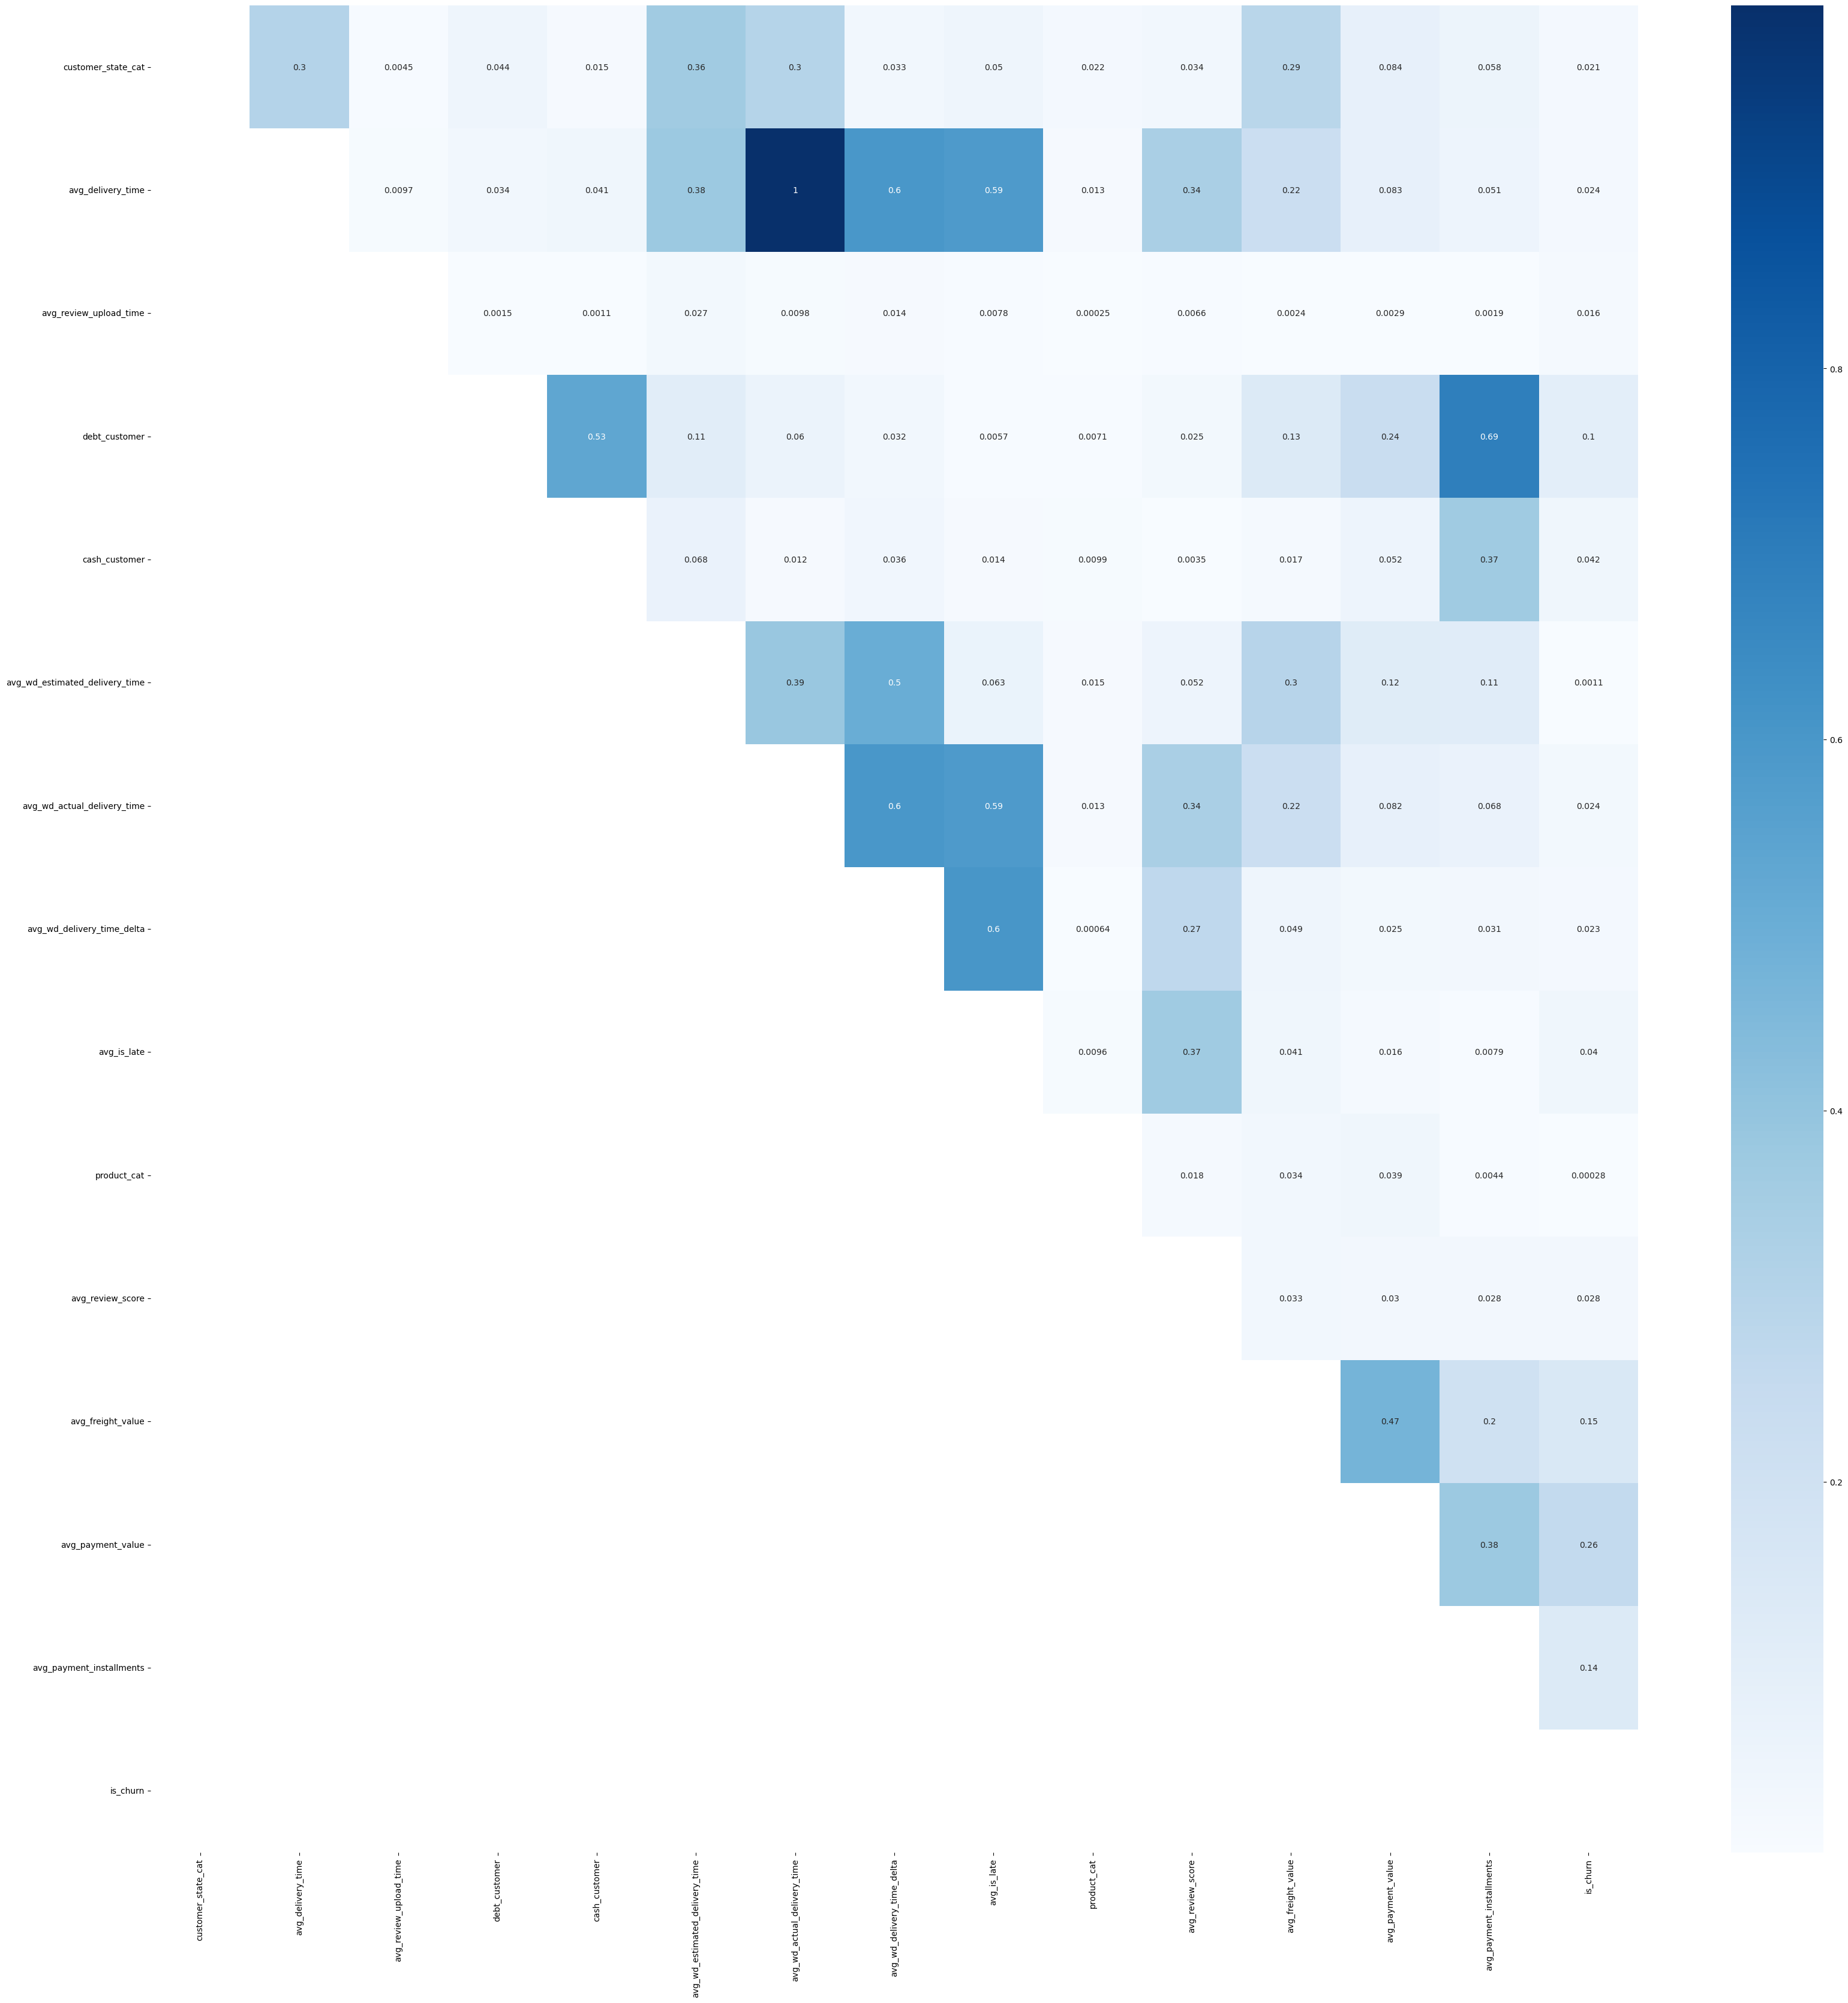

In [101]:
# create correlation matrix

corr_matrix = df3.corr().abs()

# select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(40,40))
sns.heatmap(upper, annot=True, cmap='Blues')

In [102]:
# memisahkan X dan y

y= df3['is_churn']
X= df3.drop(['is_churn', 'customer_unique_id'],1)

In [103]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [104]:
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)


In [105]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [106]:
# summarize class distribution
print("Before undersampling: ", Counter(y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train_scaled, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

model=RandomForestClassifier()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test_scaled)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))

Before undersampling:  Counter({0: 52438, 1: 10895})
After undersampling:  Counter({0: 10895, 1: 10895})
ROC AUC score for undersampled data:  0.8633649095204187


In [107]:
from imblearn.over_sampling import SMOTE
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_scaled, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

model=RandomForestClassifier()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test_scaled)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

Before oversampling:  Counter({0: 52438, 1: 10895})
After oversampling:  Counter({0: 52438, 1: 52438})
ROC AUC score for oversampled SMOTE data:  0.8004372808449991


In [108]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = smote_enn.fit_resample(X_train_scaled, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

#PART 2
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=RandomForestClassifier()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test_scaled)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

After oversampling:  Counter({1: 47509, 0: 34531})
ROC AUC score for oversampled SMOTE data:  0.8542197632158068


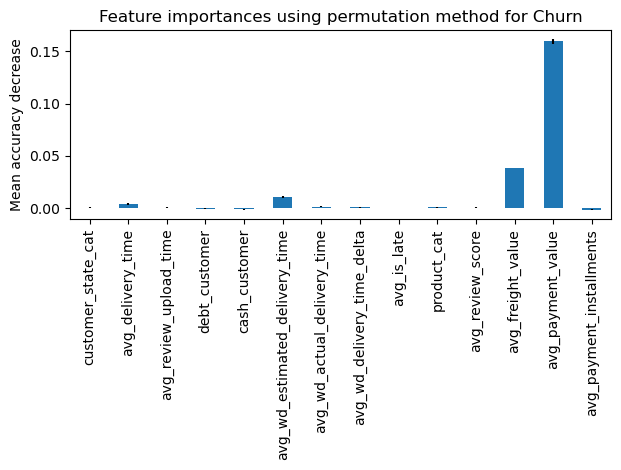

In [111]:
#get feature importance for undersampling data
#fit model
import time
from sklearn.inspection import permutation_importance
model=RandomForestClassifier()
clf_under.fit(X_train_under, y_train_under)

#Feature importance based on feature permutation
feature_names =X.columns
start_time = time.time()
result = permutation_importance(
    clf_under, X_test_scaled, y_test, n_repeats=5, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation method for Churn")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
#plt.savefig('../Analysis/FI_sales.jpg' )
plt.show()

In [112]:
forest_importances

customer_state_cat                0.000486
avg_delivery_time                 0.003854
avg_review_upload_time            0.000472
debt_customer                    -0.000538
cash_customer                    -0.001046
avg_wd_estimated_delivery_time    0.010832
avg_wd_actual_delivery_time       0.001348
avg_wd_delivery_time_delta        0.000626
avg_is_late                      -0.000111
product_cat                       0.000892
avg_review_score                  0.000516
avg_freight_value                 0.038316
avg_payment_value                 0.159798
avg_payment_installments         -0.001525
dtype: float64